In [133]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing, svm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, r2_score
import random

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

In [56]:
lim_row = 1000
total_row = 245057
skip_row = sorted(random.sample(range(total_row), total_row-lim_row))

## Reading the dataset

In [57]:
df = pd.read_csv("C:/Users/shash/Desktop/Fall 2017/Machine Learning/Exam Datasets/classification_data.tsv", sep = '\t', skiprows = skip_row)

In [58]:
df.columns= ['Red', 'Green', 'Blue', 'Class']
df.head()

,Red,Green,Blue,Class
0,78,88,128,1
1,208,216,253,1
2,207,216,253,1
3,206,218,254,1
4,191,206,252,1


## Putting target values into y

In [59]:
y = df.iloc[:, 3:]
y.head()

,Class
0,1
1,1
2,1
3,1
4,1


## Data exploration

In [60]:
df.describe()

,Red,Green,Blue,Class
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,128.806000,134.184000,124.954000,1.804000
std,63.927874,61.613492,73.036746,0.397167
min,0.000000,0.000000,0.000000,1.000000
25%,71.000000,86.750000,73.750000,2.000000
50%,143.000000,156.500000,129.000000,2.000000
75%,179.000000,179.000000,165.000000,2.000000
max,255.000000,255.000000,255.000000,2.000000


In [61]:
X = df.iloc[:,:3]
X.head()

,Red,Green,Blue
0,78,88,128
1,208,216,253
2,207,216,253
3,206,218,254
4,191,206,252


## Dimensionality reduction

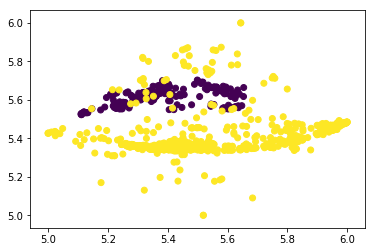

In [62]:
pca = PCA(n_components = 2) #Creating object
pca.fit(X) #Fitting the model
X_2d = pca.transform(X) #Transforming X
scaled0 = (X_2d[:,0]-min(X_2d[:,0]))/(max(X_2d[:,0])-min(X_2d[:,0])) #scaled all rows between 0 and 1
scaled1 = (X_2d[:,1]-min(X_2d[:,1]))/(max(X_2d[:,1])-min(X_2d[:,1])) #scaled all columns between 0 and 1
X_2d[:,0] = scaled0 + 5 #added a margin of 5
X_2d[:,1] = scaled1 + 5 #to the rows and columns
plt.scatter(X_2d[:,0], X_2d[:,1], c=y, marker = 'o')

## Defining confusion matrix

In [65]:
def Confusion(y_test, y_pred):
    conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
    return conf_matrix

## Defining R squared error

In [66]:
def RSquared(y_test, y_pred):
    score = r2_score(y_true = y_test, y_pred = y_pred)
    return score

## Splitting into training and testing set

The dataset needs to be split into training and testing set, as the learning algorithm needs to be first trained on the training data. The argument 'test_size=0.2' splits the dataset as 80% training and 20% testing. Once the algorithm is trained, it can be used for prediction using the testing data.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Logistic Regression

In [68]:
logistic = LogisticRegression(penalty = 'l1', C = 1)

In [69]:
logistic = logistic.fit(X_train, y_train)

In [70]:
log_pred = logistic.predict(X_test)

In [71]:
Confusion(y_test, log_pred)

array([[ 33,   4],
       [  7, 156]])

In [72]:
RSquared(y_test, log_pred)

0.63521804012601568

## Soft Margin SVM

### Linear Kernel

In [74]:
clf_linear = svm.SVC(kernel = 'linear') #Creating Object

In [75]:
clf_linear = clf_linear.fit(X_train, y_train) #Fitting model

In [76]:
clf_pred = clf_linear.predict(X_test) #Making Predictions

In [78]:
Confusion(y_test, clf_pred)

array([[ 37,   0],
       [  7, 156]])

In [79]:
RSquared(y_test, clf_pred)

0.76786602553473715

### Polynomial Kernel

In [20]:
clf_poly = svm.SVC(kernel = 'poly', gamma = 0.5)#Creating Object

In [21]:
clf_poly = clf_poly.fit(X_train, y_train)#Fitting model

In [22]:
clf_pred = clf_poly.predict(X_test)#Making Predictions

In [23]:
conf_matrix = confusion_matrix(y_true = y_test, y_pred = clf_pred)
conf_matrix

array([[ 8730,  1371],
       [  699, 38212]])

In [134]:
RSquared(y_test, clf_pred)

0.038302105786768403

### Gaussian Kernel

In [80]:
clf_gauss = svm.SVC(kernel = 'rbf', gamma = 0.5)#Creating Object

In [81]:
clf_gauss = clf_gauss.fit(X_train, y_train)#Fitting model

In [82]:
clf_pred = clf_gauss.predict(X_test)#Making Predictions

In [83]:
Confusion(y_test, clf_pred)

array([[  3,  34],
       [  0, 163]])

In [84]:
RSquared(y_test, clf_pred)

-0.12750787597413371

## Hard Margin SVM

### Linear Kernel

In [105]:
clf_linear = svm.SVC(kernel = 'linear', C=100000, max_iter=1000000)#Creating Object

In [106]:
clf_linear = clf_linear.fit(X_train, y_train)#Fitting model

In [107]:
clf_pred = clf_linear.predict(X_test)#Making Predictions

In [108]:
Confusion(y_test, clf_pred)

array([[ 32,   5],
       [  7, 156]])

In [109]:
RSquared(y_test, clf_pred)

0.60205604377383515

### Polynomial Kernel

In [110]:
clf_poly = svm.SVC(kernel = 'poly', C=100000, max_iter=1000000)#Creating Object

In [111]:
clf_poly = clf_poly.fit(X_train, y_train)#Fitting model

In [112]:
clf_pred = clf_poly.predict(X_test)#Making Predictions

In [114]:
Confusion(y_test, clf_pred)

array([[ 37,   0],
       [  2, 161]])

In [113]:
RSquared(y_test, clf_pred)

0.93367600729563915

### Gaussian Kernel

In [115]:
clf_gauss = svm.SVC(kernel = 'rbf', C=10000, max_iter=1000000)#Creating Object

In [116]:
clf_gauss = clf_gauss.fit(X_train, y_train) #Fitting model

In [117]:
clf_pred = clf_gauss.predict(X_test)#Making Predictions

In [118]:
Confusion(y_test, clf_pred)

array([[  8,  29],
       [  0, 163]])

In [119]:
RSquared(y_test, clf_pred)

0.038302105786768403

# Kernel Ridge Regression

## Linear Kernel

In [120]:
#Linear Kernel
kr = GridSearchCV(KernelRidge(kernel = 'linear', gamma = 1), cv = 5, param_grid = {"degree": [2, 4, 7]})

In [121]:
kr = kr.fit(X_train, y_train) #Fitting model

In [122]:
y_pred = kr.predict(X_test) #Predicting values
y_pred=pd.DataFrame(y_pred)
type(y_test)

pandas.core.frame.DataFrame

In [124]:
RSquared(y_test, y_pred)

-3.7001840621137712

## Polynomial Kernel

In [135]:
#Polynomial Kernel
kr_poly = GridSearchCV(KernelRidge(kernel = 'poly', gamma = 1), cv = 5, param_grid = {"degree": [2, 3]})

In [136]:
kr_poly = kr_poly.fit(X_train, y_train) #Fitting the model

In [137]:
y_pred = kr_poly.predict(X_test) #Predicting values

In [138]:
RSquared(y_test, y_pred)

0.66609721283405077

## Gaussian Kernel

In [129]:
#Polynomial Kernel
kr_gauss = GridSearchCV(KernelRidge(kernel = 'rbf'), cv = 5, param_grid = {"gamma": [0.1,0.5,1,2,4]})

In [130]:
kr_gauss = kr_gauss.fit(X_train, y_train) #Fitting Model

In [131]:
y_pred = kr_gauss.predict(X_test) #Predicting values

In [132]:
RSquared(y_test, y_pred)

-7.2635625107839665

## Deciding the best model

Based on the R Squared errors, the best model is the Hard Margin SVM using polynomial kernel, with an R Squared error of 0.93367